In [ ]:
from spacy.lang.en import English
nlp=English()
#or
# Import spaCy
#import spacy

# Create a blank English nlp object
#nlp = spacy.blank("en")

In [ ]:
#token obj
# Created by processing a string of text with the nlp object
doc = nlp("Hello world!")

# Iterate over tokens in a Doc
for token in doc:
    print(token.text)

Hello
world
!


In [ ]:
#token obj
doc = nlp("Hello world!")

# Index into the Doc to get a single Token
token = doc[1]

# Get the token text via the .text attribute
print(token.text)

world


In [ ]:
#span obj
doc = nlp("Hello world!")

# A slice from the Doc is a Span object
span = doc[1:3]

# Get the span text via the .text attribute
print(span.text)

world!


In [ ]:
#Lexical Attributes
doc = nlp("It costs $5.")
print("Index:   ", [token.i for token in doc])
print("Text:    ", [token.text for token in doc])

print("is_alpha:", [token.is_alpha for token in doc])
print("is_punct:", [token.is_punct for token in doc])
print("like_num:", [token.like_num for token in doc])

Index:    [0, 1, 2, 3, 4]
Text:     ['It', 'costs', '$', '5', '.']
is_alpha: [True, True, False, False, False]
is_punct: [False, False, False, False, True]
like_num: [False, False, False, True, False]


In [ ]:
#Model packages
#pipeline packages
#!python -m spacy download en_core_web_sm


In [ ]:
#!pip3 install spacy==3.2

In [ ]:
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_lg

In [ ]:
import en_core_web_sm
en_core_web_sm.__version__

'3.2.0'

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
#!python -m spacy validate

In [ ]:
#!pip install --upgrade en_core_web_sm

In [ ]:
#predicting part of speech taga
import spacy

# Load the small English pipeline
nlp = spacy.load("en_core_web_sm")

# Process a text
doc = nlp("She ate the pizza")

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

#DET - determiners(articles)

She PRON
ate VERB
the DET
pizza NOUN


In [ ]:
#Predicting Syntactic Dependencies
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


In [ ]:
"""Label	Description	          Example
   nsubj	nominal subject	      She
   dobj	  direct object	        pizza
   det	  determiner (article)	the
"""

'Label\tDescription\t          Example\n   nsubj\tnominal subject\t      She\n   dobj\t  direct object\t        pizza\n   det\t  determiner (article)\tthe\n'

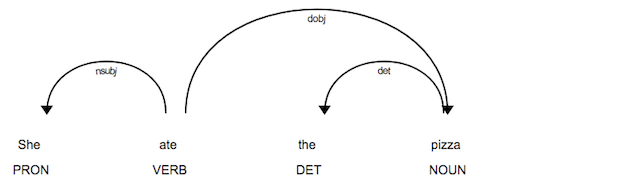

In [ ]:
#predicting named entities
# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)
#org = organization
#gpe= geopolitical region

Apple ORG
U.K. GPE
$1 billion MONEY


In [ ]:
spacy.explain("GPE")

'Countries, cities, states'

In [ ]:
"""Rule based matching

matched patterns

Match exact token texts
[{"TEXT": "iPhone"}, {"TEXT": "X"}]

Match lexical attributes
[{"LOWER": "iphone"}, {"LOWER": "x"}]

Match any token attributes
[{"LEMMA": "buy"}, {"POS": "NOUN"}]"""

'Rule based matching\n\nmatched patterns\n\nMatch exact token texts\n[{"TEXT": "iPhone"}, {"TEXT": "X"}]\n\nMatch lexical attributes\n[{"LOWER": "iphone"}, {"LOWER": "x"}]\n\nMatch any token attributes\n[{"LEMMA": "buy"}, {"POS": "NOUN"}]'

In [ ]:
#using the matcher

import spacy

# Import the Matcher
from spacy.matcher import Matcher

# Load a pipeline and create the nlp object
nlp = spacy.load("en_core_web_sm")

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", [pattern])

# Process some text
doc = nlp("Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)

In [ ]:
matches
#match id, start and end index

[(9528407286733565721, 1, 3)]

In [ ]:
# Call the matcher on the doc
doc = nlp("Upcoming iPhone X release date leaked")
matches = matcher(doc)

# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

iPhone X


In [ ]:
#Matching lexical attributes
pattern = [
    {"IS_DIGIT": True},
    {"LOWER": "fifa"},
    {"LOWER": "world"},
    {"LOWER": "cup"},
    {"IS_PUNCT": True}
]
doc = nlp("2018 FIFA World Cup: France won!")

In [ ]:
matcher.add("Lex", [pattern])
matches = matcher(doc)
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

2018 FIFA World Cup:


In [ ]:
#Matching other token attributes
# a verb with lemma love followed by noun
pattern = [
    {"LEMMA": "love", "POS": "VERB"},
    {"POS": "NOUN"}
]
doc = nlp("I loved dogs but now I love cats more.")

In [ ]:
matcher.add("Tokens", [pattern])
matches = matcher(doc)
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

loved dogs
love cats


In [ ]:
#Using operators and quantifiers (1)
pattern = [
    {"LEMMA": "buy"},
    {"POS": "DET", "OP": "?"},  # optional: match 0 or 1 times
    {"POS": "NOUN"}
]
doc = nlp("I bought a smartphone. Now I'm buying apps.")

In [ ]:
matcher.add("Quantifiers", [pattern])
matches = matcher(doc)
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

bought a smartphone
buying apps


In [ ]:
"""
Example	Description
{"OP": "!"}	Negation: match 0 times
{"OP": "?"}	Optional: match 0 or 1 times
{"OP": "+"}	Match 1 or more times
{"OP": "*"}	Match 0 or more times

"""

'\nExample\tDescription\n{"OP": "!"}\tNegation: match 0 times\n{"OP": "?"}\tOptional: match 0 or 1 times\n{"OP": "+"}\tMatch 1 or more times\n{"OP": "*"}\tMatch 0 or more times\n\n'

In [ ]:
#Shared vocab and string store
"""Vocab: stores data shared across multiple documents
To save memory, spaCy encodes all strings to hash values
Strings are only stored once in the StringStore via nlp.vocab.strings
String store: lookup table in both directions
"""
nlp.vocab.strings.add("coffee")
coffee_hash = nlp.vocab.strings["coffee"]
coffee_string = nlp.vocab.strings[coffee_hash]
#Hashes can't be reversed – that's why we need to provide the shared vocab
# Raises an error if we haven't seen the string before
string = nlp.vocab.strings[3197928453018144401]

In [ ]:
#Look up the string and hash in nlp.vocab.strings
doc = nlp("I love coffee")
print("hash value:", nlp.vocab.strings["coffee"])
print("string value:", nlp.vocab.strings[3197928453018144401])

hash value: 3197928453018144401
string value: coffee


In [ ]:
#The doc also exposes the vocab and strings
doc = nlp("I love coffee")
print("hash value:", doc.vocab.strings["coffee"])

hash value: 3197928453018144401


In [ ]:
nlp.vocab.strings["tea"]

6041671307218480733

In [ ]:
 nlp.vocab[7562983679033046312].text   #or without .text

'dog'

In [ ]:
#lexeme
#A Lexeme object is an entry in the vocabulary
doc = nlp("I love coffee")
lexeme = nlp.vocab["coffee"]

# Print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

"""
Contains the context-independent information about a word
Word text: lexeme.text and lexeme.orth (the hash)
Lexical attributes like lexeme.is_alpha
Not context-dependent part-of-speech tags, dependencies or entity labels
"""

coffee 3197928453018144401 True


'\nContains the context-independent information about a word\nWord text: lexeme.text and lexeme.orth (the hash)\nLexical attributes like lexeme.is_alpha\nNot context-dependent part-of-speech tags, dependencies or entity labels\n'

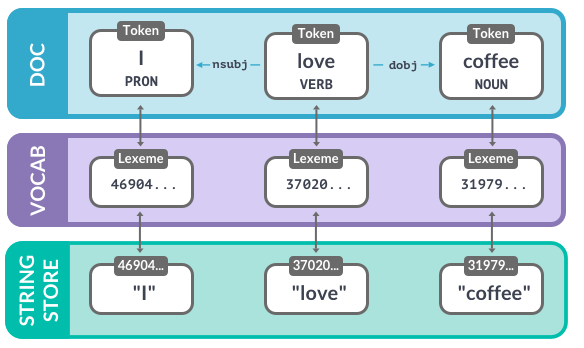

The Doc contains words in context – in this case, the tokens "I", "love" and "coffee" with their part-of-speech tags and dependencies.

Each token refers to a lexeme, which knows the word's hash ID. To get the string representation of the word, spaCy looks up the hash in the string store.

In [ ]:
#datastructures doc and its view token and span

#doc object
# Create an nlp object
import spacy
nlp = spacy.blank("en")

# Import the Doc class
from spacy.tokens import Doc

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

In [ ]:
#The Span object
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

# Create a span manually
span = Span(doc, 0, 2)

# Create a span with a label
span_with_label = Span(doc, 0, 2, label="GREETING")

# Add span to the doc.ents
doc.ents = [span_with_label]

In [ ]:
"""Word vectors and semantic similarity
Comparing semantic similarity

spaCy can compare two objects and predict similarity
Doc.similarity(), Span.similarity() and Token.similarity()
Take another object and return a similarity score (0 to 1)
Important: needs a pipeline that has word vectors included, for example:
✅ en_core_web_md (medium)
✅ en_core_web_lg (large)
🚫 NOT en_core_web_sm (small)"""
#Similarity examples (1)
#!python -m spacy download en_core_web_md 
#!python -m spacy download en

'Word vectors and semantic similarity\nComparing semantic similarity\n\nspaCy can compare two objects and predict similarity\nDoc.similarity(), Span.similarity() and Token.similarity()\nTake another object and return a similarity score (0 to 1)\nImportant: needs a pipeline that has word vectors included, for example:\n✅ en_core_web_md (medium)\n✅ en_core_web_lg (large)\n🚫 NOT en_core_web_sm (small)'

In [ ]:
#!python -m spacy download en_core_web_md 
#!python -m spacy download en_core_web_lg

In [ ]:
import spacy
# Load a larger pipeline with vectors
import en_core_web_md

nlp = en_core_web_md.load()
#nlp = spacy.load("en_core_web_md")

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

0.8627204117787385


In [ ]:
# Compare two tokens
doc = nlp("I like pizza and pasta")
token1 = doc[2]
token2 = doc[4]
print(token1.similarity(token2))

0.7369546


In [ ]:
# Compare a document with a token
doc = nlp("I like pizza")
token = nlp("soap")[0]
print(token)
print(doc.similarity(token))

soap
0.32531983166759537


In [ ]:
span = nlp("I like pizza and pasta")[2:5]
doc = nlp("McDonalds sells burgers")
print(span)
print(span.similarity(doc))

pizza and pasta
0.6199092090831612


In [ ]:
"""How does spaCy predict similarity?
Similarity is determined using word vectors
Multi-dimensional meaning representations of words
Generated using an algorithm like Word2Vec and lots of text
Can be added to spaCy's pipelines
Default: cosine similarity, but can be adjusted"""
#Word vectors in spaCy
# Load a larger pipeline with vectors
import en_core_web_md

nlp = en_core_web_md.load()
import spacy
#nlp = spacy.load("en_core_web_md")  #had to restart runtime

doc = nlp("I have a banana")
# Access the vector via the token.vector attribute
print(doc[3].vector)

[ 2.0228e-01 -7.6618e-02  3.7032e-01  3.2845e-02 -4.1957e-01  7.2069e-02
 -3.7476e-01  5.7460e-02 -1.2401e-02  5.2949e-01 -5.2380e-01 -1.9771e-01
 -3.4147e-01  5.3317e-01 -2.5331e-02  1.7380e-01  1.6772e-01  8.3984e-01
  5.5107e-02  1.0547e-01  3.7872e-01  2.4275e-01  1.4745e-02  5.5951e-01
  1.2521e-01 -6.7596e-01  3.5842e-01 -4.0028e-02  9.5949e-02 -5.0690e-01
 -8.5318e-02  1.7980e-01  3.3867e-01  1.3230e-01  3.1021e-01  2.1878e-01
  1.6853e-01  1.9874e-01 -5.7385e-01 -1.0649e-01  2.6669e-01  1.2838e-01
 -1.2803e-01 -1.3284e-01  1.2657e-01  8.6723e-01  9.6721e-02  4.8306e-01
  2.1271e-01 -5.4990e-02 -8.2425e-02  2.2408e-01  2.3975e-01 -6.2260e-02
  6.2194e-01 -5.9900e-01  4.3201e-01  2.8143e-01  3.3842e-02 -4.8815e-01
 -2.1359e-01  2.7401e-01  2.4095e-01  4.5950e-01 -1.8605e-01 -1.0497e+00
 -9.7305e-02 -1.8908e-01 -7.0929e-01  4.0195e-01 -1.8768e-01  5.1687e-01
  1.2520e-01  8.4150e-01  1.2097e-01  8.8239e-02 -2.9196e-02  1.2151e-03
  5.6825e-02 -2.7421e-01  2.5564e-01  6.9793e-02 -2

In [ ]:
#Similarity depends on the application context
#Useful for many applications: recommendation systems, flagging duplicates etc.
#There's no objective definition of "similarity"
#Depends on the context and what application needs to do
doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

print(doc1.similarity(doc2))

0.9501447503553421


In [ ]:
matcher = Matcher(nlp.vocab)
matcher.add("DOG", [[{"LOWER": "golden"}, {"LOWER": "retriever"}]])
doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print("Matched span:", span.text)
    # Get the span's root token and root head token
    print("Root token:", span.root.text)
    print("Root head token:", span.root.head.text)
    # Get the previous token and its POS tag
    print("Previous token:", doc[start - 1].text, doc[start - 1].pos_)

Matched span: Golden Retriever
Root token: Retriever
Root head token: have
Previous token: a DET


In [ ]:
"""Efficient phrase matching 
PhraseMatcher like regular expressions or keyword search – but with access to the tokens!
Takes Doc object as patterns
More efficient and faster than the Matcher
Great for matching large word lists"""

from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

pattern = nlp("Golden Retriever")
matcher.add("DOG", [pattern])
doc = nlp("I have a Golden Retriever")

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Get the matched span
    span = doc[start:end]
    print("Matched span:", span.text)


Matched span: Golden Retriever


In [ ]:
#processing pipelines
#What happens when you call nlp?

doc = nlp("This is a sentence.")

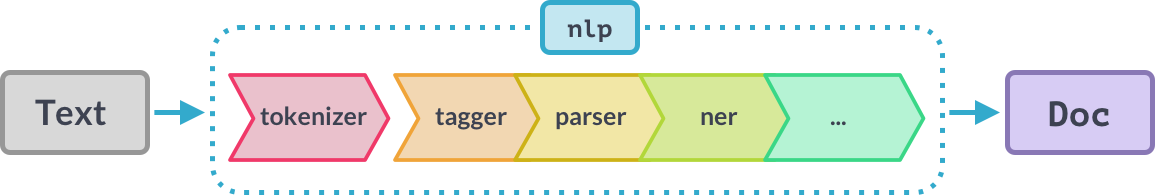

In [ ]:
"""Built-in pipeline components
Name	Description	Creates
tagger	Part-of-speech tagger	Token.tag, Token.pos
parser	Dependency parser	Token.dep, Token.head, Doc.sents, Doc.noun_chunks
ner	Named entity recognizer	Doc.ents, Token.ent_iob, Token.ent_type
textcat	Text classifier	Doc.cats"""


'Built-in pipeline components\nName\tDescription\tCreates\ntagger\tPart-of-speech tagger\tToken.tag, Token.pos\nparser\tDependency parser\tToken.dep, Token.head, Doc.sents, Doc.noun_chunks\nner\tNamed entity recognizer\tDoc.ents, Token.ent_iob, Token.ent_type\ntextcat\tText classifier\tDoc.cats'

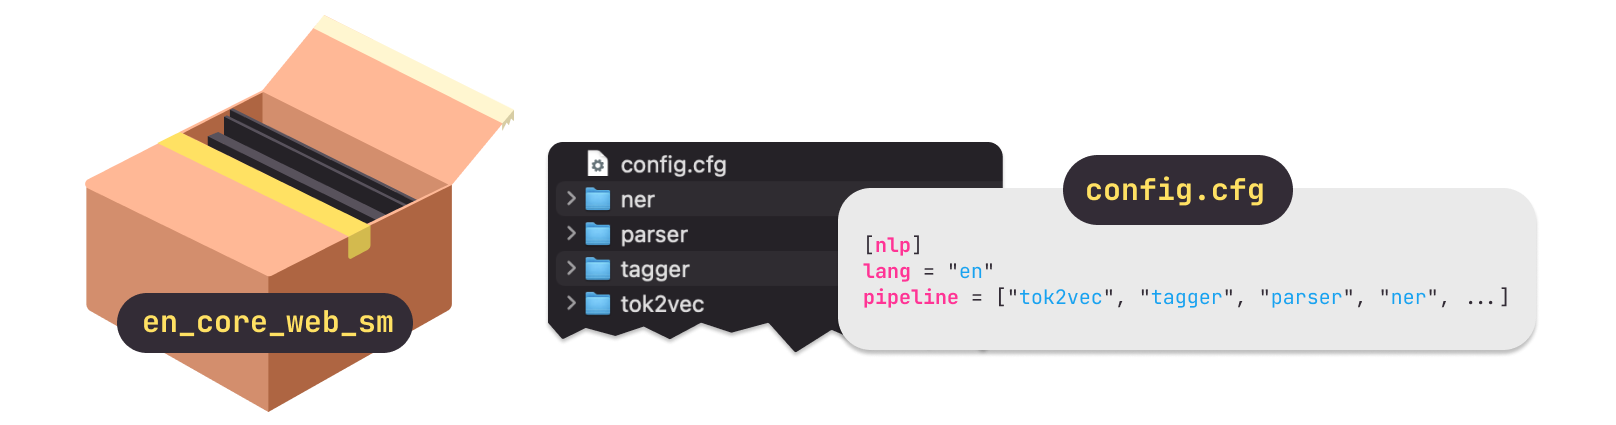

In [ ]:
import spacy
#nlp = spacy.load("en_core_web_md")
import en_core_web_md

nlp = en_core_web_md.load()
 #Pipeline attributes
#nlp.pipe_names: list of pipeline component names
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [ ]:
#nlp.pipeline: list of (name, component) tuples
print(nlp.pipeline)

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x7f5dbf606d70>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x7f5dbf606c90>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x7f5dbd40fa50>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x7f5dbe3ff2d0>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x7f5dbe279c80>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x7f5dbd40fd50>)]


In [ ]:
"""def custom_component(doc):
    # Do something to the doc here
    return doc

nlp.add_pipe("custom_component")"""

"""Argument	  Description	              Example
last	        If True, add last	        nlp.add_pipe("component", last=True)
first	        If True, add first	      nlp.add_pipe("component", first=True)
before	      Add before component	    nlp.add_pipe("component", before="ner")
after	        Add after component	      nlp.add_pipe("component", after="tagger")"""
import spacy
from spacy.language import Language
# Create the nlp object
#nlp = spacy.load("en_core_web_sm")
import en_core_web_md

nlp = en_core_web_md.load()

# Define a custom component
@Language.component("custom_component")
def custom_component_fun(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)

# Print the pipeline component names
print("Pipeline:", nlp.pipe_names)

Pipeline: ['custom_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [ ]:
doc = nlp("Hello world!")

Doc length: 3


In [ ]:
#Setting custom attributes
#Add custom metadata to documents, tokens and spans
#Accessible via the ._ property
'''doc._.title = "My document"
token._.is_color = True
span._.has_color = False
#Registered on the global Doc, Token or Span using the set_extension method
# Import global classes
from spacy.tokens import Doc, Token, Span

# Set extensions on the Doc, Token and Span
Doc.set_extension("title", default=None)
Token.set_extension("is_color", default=False)
Span.set_extension("has_color", default=False)'''

'doc._.title = "My document"\ntoken._.is_color = True\nspan._.has_color = False\n#Registered on the global Doc, Token or Span using the set_extension method\n# Import global classes\nfrom spacy.tokens import Doc, Token, Span\n\n# Set extensions on the Doc, Token and Span\nDoc.set_extension("title", default=None)\nToken.set_extension("is_color", default=False)\nSpan.set_extension("has_color", default=False)'

In [ ]:
#Extension attribute types
#Attribute extensions
#Property extensions
#Method extensions

In [ ]:
#Attribute extensions
#Set a default value that can be overwritten
import spacy
from spacy.tokens import Token
# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Set extension on the Token with default value
Token.set_extension("iscolor", default=False,force=True)#force=True because already added attribute

doc = nlp("The sky is blue.")

# Overwrite extension attribute value
doc[3]._.iscolor = True

In [ ]:
from spacy.tokens import Token

# Define getter function
def get_is_color(token):
    colors = ["red", "yellow", "blue"]
    return token.text in colors

# Set extension on the Token with getter
Token.set_extension("is_color", getter=get_is_color,force=True)

doc = nlp("The sky is blue.")
print(doc[3]._.is_color, "-", doc[3].text)

True - blue


In [ ]:
#Property extensions 
#Span extensions should almost always use a getter
from spacy.tokens import Span

# Define getter function
def get_has_color(span):
    colors = ["red", "yellow", "blue"]
    return any(token.text in colors for token in span)

# Set extension on the Span with getter
Span.set_extension("has_color", getter=get_has_color)

doc = nlp("The sky is blue.")
print(doc[1:4]._.has_color, "-", doc[1:4].text)
print(doc[0:2]._.has_color, "-", doc[0:2].text)

True - sky is blue
False - The sky


In [ ]:
#Method extensions
# Assign a function that becomes available as an object method
# Lets you pass arguments to the extension function
from spacy.tokens import Doc

# Define method with arguments
def has_token(doc, token_text):
    in_doc = token_text in [token.text for token in doc]
    return in_doc

# Set extension on the Doc with method
Doc.set_extension("has_token", method=has_token)

doc = nlp("The sky is blue.")
print(doc._.has_token("blue"), "- blue")
print(doc._.has_token("cloud"), "- cloud")

True - blue
False - cloud


In [ ]:
"""Processing large volumes of text
Use nlp.pipe method
Processes texts as a stream, yields Doc objects
Much faster than calling nlp on each text
BAD:

docs = [nlp(text) for text in LOTS_OF_TEXTS]
GOOD:

docs = list(nlp.pipe(LOTS_OF_TEXTS))"""

'Processing large volumes of text\nUse nlp.pipe method\nProcesses texts as a stream, yields Doc objects\nMuch faster than calling nlp on each text\nBAD:\n\ndocs = [nlp(text) for text in LOTS_OF_TEXTS]\nGOOD:\n\ndocs = list(nlp.pipe(LOTS_OF_TEXTS))'

In [ ]:
#Setting as_tuples=True on nlp.pipe lets you pass in (text, context) tuples
#Yields (doc, context) tuples
#Useful for associating metadata with the doc
data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    print(doc.text, context["page_number"])

This is a text 15
And another text 16


In [ ]:
from spacy.tokens import Doc

Doc.set_extension("id", default=None)
Doc.set_extension("page_number", default=None)

data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    doc._.id = context["id"]
    doc._.page_number = context["page_number"]

In [ ]:
"""Training and updating models

How training works

Initialize the model weights randomly
Predict a few examples with the current weights
Compare prediction with true labels
Calculate how to change weights to improve predictions
Update weights slightly
Go back to 2.
Training data: Examples and their annotations.
Text: The input text the model should predict a label for.
Label: The label the model should predict.
Gradient: How to change the weights."""


'Training and updating models\n\nHow training works\n\nInitialize the model weights randomly\nPredict a few examples with the current weights\nCompare prediction with true labels\nCalculate how to change weights to improve predictions\nUpdate weights slightly\nGo back to 2.'

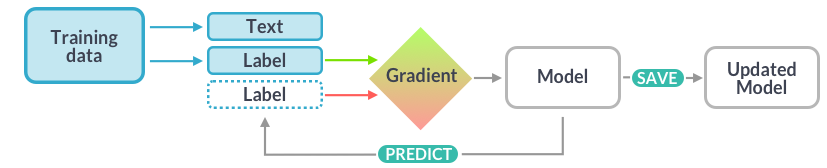

In [ ]:
# Example: Training the entity recognizer
# The entity recognizer tags words and phrases in context
# Each token can only be part of one entity
# Examples need to come with context  (ctrl /)
import spacy
from spacy.tokens import Doc, Span
nlp = spacy.blank("en")
doc = nlp("iPhone X is coming")
doc.ents = [Span(doc, 0, 2, label="GADGET")]

In [ ]:
#Texts with no entities are also important
doc = nlp("I need a new phone! Any tips?")
doc.ents = []

In [ ]:
# The training data
# Examples of what we want the model to predict in context
# Update an existing model: a few hundred to a few thousand examples
# Train a new category: a few thousand to a million examples
# spaCy's English models: 2 million words
# Usually created manually by human annotators
# Can be semi-automated – for example, using spaCy's Matcher!
# Training vs. evaluation data
# Training data: used to update the model
# Evaluation data:
# data the model hasn't seen during training
# used to calculate how accurate the model is
# should be representative of the data the model will see at runtime

In [ ]:
import spacy

nlp = spacy.blank("en")

# Create a Doc with entity spans
doc1 = nlp("iPhone X is coming")
doc1.ents = [Span(doc1, 0, 2, label="GADGET")]
# Create another doc without entity spans
doc2 = nlp("I need a new phone! Any tips?")

docs = [doc1, doc2]  # and so on...
len(docs)

2

In [ ]:
# split data into two portions:
# training data: used to update the model
# development data/evaluation data: used to evaluate the model
import random
random.shuffle(docs)
train_docs = docs[:len(docs) // 2]
dev_docs = docs[len(docs) // 2:]

In [ ]:
# DocBin: container to efficiently store and save Doc objects
# can be saved to a binary file
# binary files are used for training
import spacy
from spacy.tokens import DocBin
# Create and save a collection of training docs
train_docbin = DocBin(docs=train_docs)
train_docbin.to_disk("./train.spacy")
# Create and save a collection of evaluation docs
dev_docbin = DocBin(docs=dev_docs)
dev_docbin.to_disk("./dev.spacy")

TypeError: ignored

In [ ]:
# Tip: Converting your data
# spacy convert lets you convert corpora in common formats
# supports .conll, .conllu, .iob and spaCy's old JSON format
#$ python -m spacy convert ./train.gold.conll ./corpus

/bin/bash: $: command not found


In [ ]:
"""
The training config
single source of truth for all settings
typically called config.cfg
defines how to initialize the nlp object
includes all settings about the pipeline components and their model implementations
configures the training process and hyperparameters
makes your training more reproducible
spaCy uses a config file, usually called config.cfg, as the "single source of truth" for all settings. The config file defines how 
to initialize the nlp object, which pipeline components to add and how their internal model implementations should be configured. 
It also includes all settings for the training process and how to load the data, including hyperparameters.
Instead of providing lots of arguments on the command line or having to remember to define every single setting in code, you only 
need to pass your config file to spaCy's training command.
Config files also help with reproducibility: you'll have all settings in one place and always know how your pipeline was trained.
You can even check your config file into a Git repo to version it and share it with others so they can train the same pipeline
with the same settings.
"""

'\nThe training config\nsingle source of truth for all settings\ntypically called config.cfg\ndefines how to initialize the nlp object\nincludes all settings about the pipeline components and their model implementations\nconfigures the training process and hyperparameters\nmakes your training more reproducible\n'

In [ ]:
"""
Generating a config
spaCy can auto-generate a default config file for you"""

# $ python -m spacy init config ./config.cfg --lang en --pipeline ner

"""init config: the command to run
config.cfg: output path for the generated config
--lang: language class of the pipeline, e.g. en for English
--pipeline: comma-separated names of components to include

Training a pipeline 
all you need is the config.cfg and the training and development data
config settings can be overwritten on the command line"""

# $ python -m spacy train ./config.cfg --output ./output --paths.train train.spacy --paths.dev dev.spacy

"""train: the command to run
config.cfg: the path to the config file
--output: the path to the output directory to save the trained pipeline
--paths.train: override with path to the training data
--paths.dev: override with path to the evaluation data


Loading a trained pipeline
output after training is a regular loadable spaCy pipeline
model-last: last trained pipeline
model-best: best trained pipeline
load it with spacy.load
import spacy

nlp = spacy.load("/path/to/output/model-best")
doc = nlp("iPhone 11 vs iPhone 8: What's the difference?")
print(doc.ents)
"""

'train: the command to run\nconfig.cfg: the path to the config file\n--output: the path to the output directory to save the trained pipeline\n--paths.train: override with path to the training data\n--paths.dev: override with path to the evaluation data\n\n\nLoading a trained pipeline\noutput after training is a regular loadable spaCy pipeline\nmodel-last: last trained pipeline\nmodel-best: best trained pipeline\nload it with spacy.load\nimport spacy\n\nnlp = spacy.load("/path/to/output/model-best")\ndoc = nlp("iPhone 11 vs iPhone 8: What\'s the difference?")\nprint(doc.ents)\n'

In [ ]:
# Best practices for training spaCy models
# Problem 1: Models can "forget" things
# Statistical models can learn lots of things – but they can also unlearn them.If you're updating an existing model with new data,
#  especially new labels, it can overfit and adjust too much to the new examples.
# For instance, if you're only updating it with examples of "WEBSITE", it may "forget" other labels it previously predicted c
# orrectly – like "PERSON".
# This is also known as the catastrophic forgetting problem.
# Solution 1: Mix in previously correct predictions
# For example, if you're training "WEBSITE", also include examples of "PERSON"
# Run existing spaCy model over data and extract all other relevant entities

# Problem 2: Models can't learn everything
# spaCy's models make predictions based on local context
# Model can struggle to learn if decision is difficult to make based on context
# Label scheme needs to be consistent and not too specific
# For example: "CLOTHING" is better than "ADULT_CLOTHING" and "CHILDRENS_CLOTHING"
# Solution 2: Plan your label scheme carefully
# Pick categories that are reflected in local context
# More generic is better than too specific
# Use rules to go from generic labels to specific categories
# BAD:

# LABELS = ["ADULT_SHOES", "CHILDRENS_SHOES", "BANDS_I_LIKE"]
# GOOD:

# LABELS = ["CLOTHING", "BAND"]